# Machine Learning model for predicting numbers from images

In [1]:
# Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Determing the total number of image and labels
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


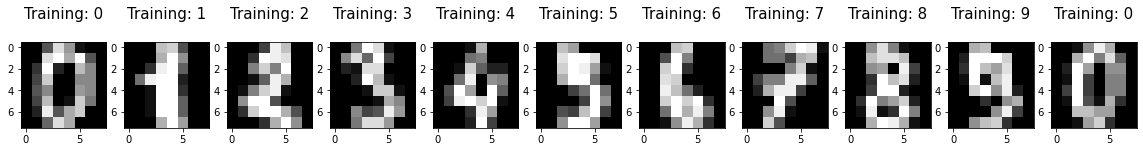

In [3]:
# displaying the images
plt.figure(figsize = (20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:11], digits.target[0:11])):
  plt.subplot(1, 11, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
  plt.title("Training: %i\n"% label, fontsize = 15)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Train test and splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [6]:
# Trining data which is around 77% of the whole data
print(X_train.shape)

(1383, 64)


In [7]:
print(Y_train.shape)

(1383,)


In [8]:
# Test data which is 23% of the whole data
print(X_test.shape)

(414, 64)


In [9]:
print(Y_test.shape)

(414,)


In [10]:
# Importing Logistic Regression library
from sklearn.linear_model import LogisticRegression

In [11]:
LogisticRegr = LogisticRegression()

In [12]:
LogisticRegr.fit(X_train, Y_train)

LogisticRegression()

In [13]:
# Predicting for one observation or image here 

print(LogisticRegr.predict(X_test[1].reshape(1, -1)))

[0]


In [14]:
LogisticRegr.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [15]:
# Predicting for the whole test data
y_predict = LogisticRegr.predict(X_test)

In [16]:
y_predict 

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 8, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 8, 8, 8, 9, 8, 5, 8, 4, 8,
       3, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 1, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 4, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 3, 1, 3, 5, 2, 8, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 3, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 9, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [17]:
# Checking the accuracy of the model
score = LogisticRegr.score(X_test, Y_test)
score = score*100
score

95.16908212560386

In [18]:
# Representing the confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, y_predict)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 30]], dtype=int64)

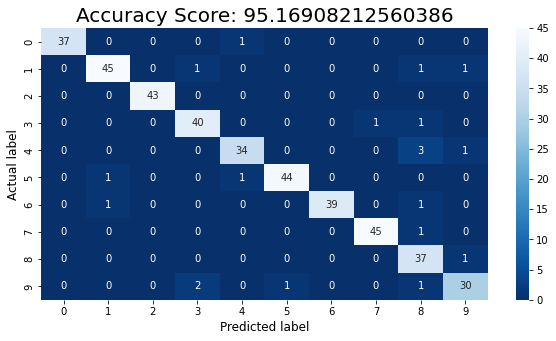

In [19]:
# Representing the confusion matrix on heatmap 
plt.figure(figsize = (10, 5))
sns.heatmap(cm, annot = True, cmap = "Blues_r")
plt.title("Accuracy Score: {}".format(score), fontsize = 20)
plt.xlabel("Predicted label", fontsize = 12)
plt.ylabel("Actual label", fontsize = 12)
plt.show()

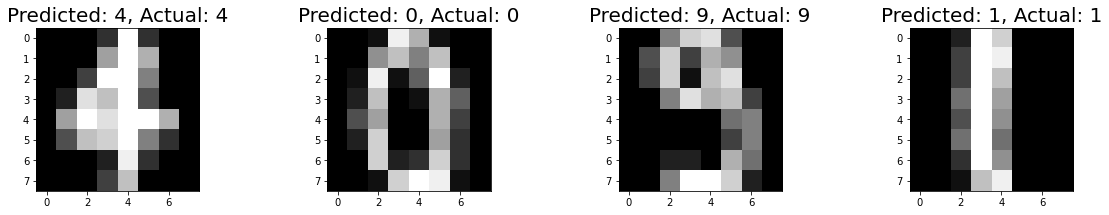

In [20]:
index = 0
classifiedIndex = []
for predict, actual in zip(y_predict, Y_test):
  if predict == actual:
    classifiedIndex.append(index)
  index += 1
plt.figure(figsize = (20, 3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
  plt.subplot(1, 4, plotIndex + 1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap = plt.cm.gray)
  plt.title("Predicted: {}, Actual: {}".format(y_predict[wrong], Y_test[wrong]), fontsize = 20)

# Summary 
    
    - The model is able to predict the numbers from the image data with 95.16% accuracy.
    - 77% of the data is trained to test on 23% of the data. 